# Openseespy : An introduction 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import openseespylinux.opensees as ops
from mpl_toolkits.mplot3d import Axes3D

## Setup

In [2]:
from building import BuildingModel
from motif import Motif
from motifs_lib import motifs
from motifs_lib import wrap_4faces

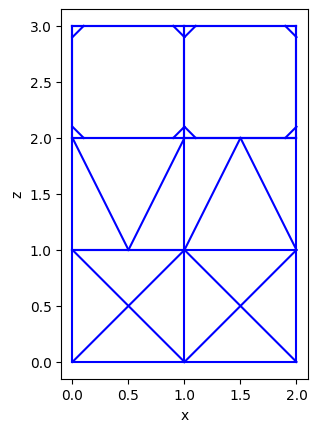

In [3]:

# Creat a 2D building and apply a motif
model = BuildingModel()

model.generate_regular_building(
    m=3,       # 4 nodes par étage
    n=4,       # 4 étages
    dx=1, dy=0, dz=1,
    mode="2D",
    A=0.02, E=2e11
)

motifs["square_2D_X"].apply_to_model(model, 0, dx=1, dy=0, dz=1, area=0.02, E=2e11)
motifs["square_2D_X"].apply_to_model(model, 1, dx=1, dy=0, dz=1, area=0.02, E=2e11)
motifs["square_2D_V"].apply_to_model(model, 3, dx=1, dy=0, dz=1, area=0.02, E=2e11)
motifs["square_2D_INVV"].apply_to_model(model, 4, dx=1, dy=0, dz=1, area=0.02, E=2e11)
motifs["square_2D_framedTr"].apply_to_model(model, 6, dx=1, dy=0, dz=1, area=0.02, E=2e11)
motifs["square_2D_framedTr"].apply_to_model(model, 7, dx=1, dy=0, dz=1, area=0.02, E=2e11)

model.plot()



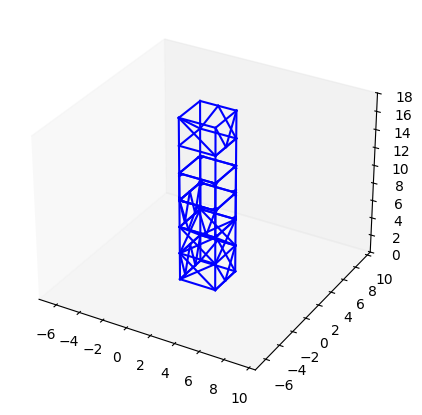

: 

In [ ]:

# Creat a 2D building and apply a motif
model = BuildingModel()

model.generate_regular_building(
    m=2,       # 4 nodes par étage
    n=6,       # 4 étages
    dx=3, dy=3, dz=3,
    mode="3D",
    A=0.02, E=2e11
)

motifs["custom_4faces_1"] = wrap_4faces(motifs["square_2D_X"],motifs["square_2D_V"],motifs["square_2D_INVV"],motifs["square_2D_W"])
motifs["custom_4faces_2"] = wrap_4faces(motifs["square_2D_X"],motifs["square_2D_X"],motifs["square_2D_X"],motifs["square_2D_X"])
motifs["custom_4faces_3"] = wrap_4faces(motifs["square_2D_W"],motifs["square_2D_framedTr"],motifs["square_2D_framedTr"],motifs["square_2D_W"])
motifs["custom_4faces_4"] = wrap_4faces(motifs["square_2D_framedTr"],motifs["square_2D_framedTr"],motifs["square_2D_framedTr"],motifs["square_2D_framedTr"])
motifs["custom_4faces_5"] = wrap_4faces(motifs["square_2D_diag2"],motifs["square_2D_V"],motifs["square_2D_INVV"],motifs["square_2D_diag1"])
motifs["custom_4faces"] = wrap_4faces(motifs["square_2D"],motifs["square_2D"],motifs["square_2D"],motifs["square_2D"])


motifs["custom_4faces_1"].apply_to_model(model, 0, dx=3, dy=3, dz=3, area=0.02, E=2e11)
motifs["custom_4faces_2"].apply_to_model(model, 4, dx=3, dy=3, dz=3, area=0.02, E=2e11)
motifs["custom_4faces_3"].apply_to_model(model, 8, dx=3, dy=3, dz=3, area=0.02, E=2e11)
motifs["custom_4faces_4"].apply_to_model(model, 12, dx=3, dy=3, dz=3, area=0.02, E=2e11)
motifs["custom_4faces"].apply_to_model(model, 16, dx=3, dy=3, dz=3, area=0.02, E=2e11)
motifs["custom_4faces_5"].apply_to_model(model, 20, dx=3, dy=3, dz=3, area=0.02, E=2e11)


model.plot()



In [ ]:
from building import BuildingModel
from motifs_lib import motifs

# --- 1. petit modèle 3D ---
model = BuildingModel()
model.generate_regular_building(m=2, n=3, dx=3, dy=3, dz=3, mode="3D")

# --- 2. transformer 1 barre en BEAM pour test ---
# Choisir un élément (ici le premier)
e = model.elements[0]
e.etype = "beam"
e.G  = 8e10
e.J  = 1e-4
e.Iy = 1e-4
e.Iz = 1e-4

# --- 3. transformer en OpenSees ---
ops = model.to_opensees()

# --- 4. analyse statique simple ---
ops.timeSeries("Linear", 1)
ops.pattern("Plain", 1, 1)

# charger le node du haut
top_node = max(n.id for n in model.nodes)
ops.load(top_node, 0, 0, -10_000, 0, 0, 0)

ops.system("BandGeneral")
ops.numberer("RCM")
ops.constraints("Plain")
ops.algorithm("Linear")
ops.analysis("Static")
ops.analyze(1)

# --- 5. affichage du déplacement ---
print("Uz =", ops.nodeDisp(top_node, 3))
import opsvis as opsv

opsv.plot_model("nodes")
opsv.plot_model("elements")

